In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


We assume that the neuron’s firing rate x, i.e., its average number of action
potentials per second, is given by the differential equation

$$
x'(t)= -x(t)+f(wx(t)+I)
$$

where w = 0.04 is the strength of the synaptic connection and I = −2 is some constant, external
(and inhibitory) background input. The input-output (or activation) function of the neuron is given by a sigmoidal function which we assume to be 

$$
⁍
$$

 where s is the total input to the neuron.

Programming Help: The hyperbolic tangent is defined as

$$
tanh(x)=(e^x-e^{-x})/(e^x+e^{-x})
$$

In [2]:
def activation_function(s): #s is the input signal
    return 50*(1+np.tanh(s)) #output firing rate at given time point
# x firing rate
i=-2 #some constant
w = 0.04 # w weight strenth of synapse

def derivative_firing_rate(x, w=0.04):
    return -x + (activation_function(w*x+i)) 

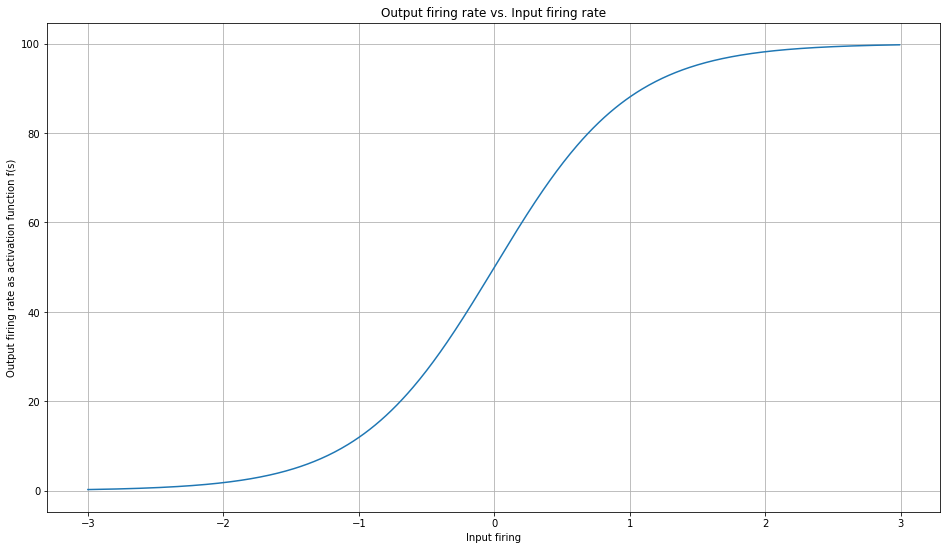

In [3]:
inputs = np.arange(-3, 3, 0.01)
outputs = activation_function(inputs)# output=x(t)=f(s)=level of activity of neuron at time t

## Plot with matplotlib
plt.figure(figsize=(16,9))
plt.plot(inputs, outputs)
plt.xlabel('Input firing')
plt.ylabel('Output firing rate as activation function f(s)')
plt.title('Output firing rate vs. Input firing rate')
plt.grid()
# Plotly
# fig = go.Figure()
# fig.update_layout(template='plotly
# _white'
#     , width=800, height=500)
# fig.add_trace(go.Scatter(x=inputs, y=outputs,             mode='lines',                       name='Output firing rate'))
# fig.add_trace(go.Scatter(x=inputs, y=delta_firing_rate,                    mode='lines',                    name='Change in firing rate'))
# fig.update_layout(title='Output firing rate vs. Input firing rate',                     xaxis_title='Input firing rate',                           yaxis_title='Output firing rate')
# fig.show()


#### (b) Plot the derivatives x˙ as a function of the neuron’s firing rate x.
 What do the zero-crossings of this plot indicate?

In [4]:
i=-2 #some constant
w = 0.04 # w weight strenth of synapse
delta_firing_rate= derivative_firing_rate(outputs, w)
# Compute the point of derivative of firing rate wher it is zero
# find indices where derivative of firing rate is zero
indices = np.where(np.diff(np.sign(delta_firing_rate)))[0]
#draw line
# plt.figure(figsize=(16,9))
# # draw horizontal line
# plt.axhline(y=0, color='r', linestyle='dashed')
# # draw vertical line
# plt.axvline(x=0, color='r', linestyle='dashed')
# plt.ylabel('Derivative of firing rate x*')
# plt.xlabel('Output firing rate')
# plt.plot(outputs, delta_firing_rate)
# plt.title('Change in firing rate vs. Output firing rate')


# plt.plot(outputs[indices], delta_firing_rate[indices], 'ko', label='zero derivative')
# # add arrows on zero derivative points
# for j in indices:
#         # add arrows to right and left of zero derivative points as stable and unstable equilibrium points
#         if delta_firing_rate[j] > 0:
#                 plt.annotate('stable equilibrium', xy=(outputs[j], delta_firing_rate[j]), xytext=(outputs[j]+2, delta_firing_rate[j]+4),
#                 arrowprops=dict(facecolor='green', shrink=0.05),     )
#         else:
#                 plt.annotate('unstable equilibrium', xy=(outputs[j], delta_firing_rate[j]), xytext=(outputs[j]-2, delta_firing_rate[j]-4),
#                 arrowprops=dict(facecolor='blue', shrink=0.05),     )

# plt.legend()

fig = go.Figure()
fig.update_layout(template='plotly_white'
    , width=800, height=500)
fig.add_trace(go.Scatter(x=outputs, y=delta_firing_rate,                    mode='lines',                    name='Change in firing rate X'))
fig.update_layout(title='Change in firing rate vs. Output firing rate',                     xaxis_title='Firing rate X',                           yaxis_title='Change in firing rate X*')
# add arrows on zero derivative points
for j in indices:
        # add arrows to right and left of zero derivative points as stable and unstable equilibrium points
        if delta_firing_rate[j] > 0:
                fig.add_annotation(x=outputs[j], y=delta_firing_rate[j], text="stable equilibrium", showarrow=True, arrowhead=1, ax=20, ay=-30)
        else:
                fig.add_annotation(x=outputs[j], y=delta_firing_rate[j], text="unstable equilibrium", showarrow=True, arrowhead=1, ax=-20, ay=30)
# add legend to zero derivative points
fig.add_trace(go.Scatter(x=outputs[indices], y=delta_firing_rate[indices], mode='markers', name='zero derivative'))
fig.show()

(c) Simulate the system for different initial conditions, x(0) = 49, x(0) = 50, and x(0) = 51, using a time step dt = 0.1. Choose a reasonable value of T, What are the outcomes of these simulations? Why?

In [5]:
#(c) Simulate the system for different initial conditions, x(0) = 49, x(0) = 50, and x(0) = 51, using a time step dt = 0.1. Choose a reasonable value of T, What are the outcomes of these simulations? Why?
# x firing rate
i=-2 #some constant
w = 0.04 # w weight strenth of synapse
dt = 0.1 # time step
T = 100 # total time
t = np.arange(0, T, dt) # time vector
x0 = 49 # initial condition
x1 = 50 # initial condition
x2 = 51 # initial condition
def firing_rate(x0, w=0.04, dt=0.1, T=100):
    t = np.arange(0, T, dt) # time vector
    x = np.zeros(len(t))# array for firing rate outputs
    x[0] = x0 # set initial condition
    # Euler's method
    for i in range(1, len(t)):
        x[i] = x[i-1] + dt*derivative_firing_rate(x[i-1], w)
    return x
# call function
x0 = 49
x1 = 50
x2 = 51
x = firing_rate(x0)
x1 = firing_rate(x1)
x2 = firing_rate(x2)

# Plot
# plt.figure(figsize=(16,9))
# plt.plot(t, x, label='x0 = 49')
# plt.plot(t, x1, label='x0 = 50')
# plt.plot(t, x2, label='x0 = 51')
# plt.xlabel('Time')
# plt.ylabel('Firing rate')
# plt.title('Firing rate vs. Time')
# plt.grid()
# plt.legend()
# plt.xlim(0, 10)
# # plt.show()

# Plotly
fig = go.Figure()
fig.update_layout(template='plotly_white'
    , width=800, height=500)
fig.add_trace(go.Scatter(x=t, y=x, mode='lines', name='x0 = 49'))
fig.add_trace(go.Scatter(x=t, y=x1, mode='lines', name='x0 = 50'))
fig.add_trace(go.Scatter(x=t, y=x2, mode='lines', name='x0 = 51'))
fig.update_layout(title='Firing rate vs. Time', xaxis_title='Time', yaxis_title='Firing rate')
fig.update_xaxes(range=[0, 10])
fig.show()
#When the starting firing rate is 49, the firing rate decreases to 0. 
# When the starting firing rate is 50, the firing rate remains constant at 50. 
# When the starting firing rate is 51, the firing rate increases to 100. 
# This is because the derivative of the firing rate is zero at 50,
#  and the derivative of the firing rate is positive at 51 and negative at 49.



(d) Redo the simulation of (c), but add a noise component to the system, so that x˙(t) = −x(t) + f(wx(t) + I ) + ση(t) where η(t) is Gaussian white noise. What happens for a noise value of σ = 5? What happens if you increase the noise (up to σ = 80)? Why?

In [6]:
# (d) Redo the simulation of (c), but add a noise component to the system, so that x˙(t) = −x(t) + f(wx(t) + I ) + ση(t) where η(t) is Gaussian white noise. What happens for a noise value of σ = 5? What happens if you increase the noise (up to σ = 80)? Why?
# When the noise value of sigma is 5 the system is stable and converges to a stable equilibrium point. 
# When starting firing rate is 49, the system converges to a stable equilibrium point at 0. This is because the firing rate is below the threshold and the system is stable.
# When starting firing rate is 50, the system converges to a stable equilibrium point at 50. This is because the firing rate is at the threshold and the system is stable.
# When starting firing rate is 51, the system converges to a stable equilibrium point at 100. This is because the firing rate is above the threshold and the system is stable.
# x firing rate
i=-2 #some constant
w = 0.04 # w weight strenth of synapse
dt = 0.1 # time step
T = 100 # total time
t = np.arange(0, T, dt) # time vector
x0 = 49 # initial condition
x1 = 50 # initial condition
x2 = 51 # initial condition
def firing_rate_noise(x0, w=0.04, dt=0.1, T=100, sigma=5):
    t = np.arange(0, T, dt) # time vector
    x = np.zeros(len(t))# array for firing rate outputs
    x[0] = x0 # set initial condition
    # Euler's method
    # Euler method should be replaced by stochastic Euler method
    # euler method here is used by adding noise to the derivative
    for i in range(1, len(t)):
        x[i] = x[i-1] + dt*derivative_firing_rate(x[i-1], w) + sigma*np.random.randn()
    return x
# call function
x0 = 49
x1 = 50
x2 = 51
x = firing_rate_noise(x0)
x1 = firing_rate_noise(x1)
x2 = firing_rate_noise(x2)
# plotly
fig = go.Figure()
fig.update_layout(template='plotly_white'
    , width=800, height=500)
fig.add_trace(go.Scatter(x=t, y=x, mode='lines', name='x0 = 49'))
fig.add_trace(go.Scatter(x=t, y=x1, mode='lines', name='x0 = 50'))
fig.add_trace(go.Scatter(x=t, y=x2, mode='lines', name='x0 = 51'))
fig.update_layout(title='Firing rate vs. Time', xaxis_title='Time', yaxis_title='Firing rate')
fig.update_xaxes(range=[0, 10])
fig.show()



What happens when the noise is increased to 80?

In [7]:
# When we increase the noise to 80. The system becomes unstable and the firing rate increases to infinity. 
# This is because the noise is so large that it is able to overcome the negative feedback of the system and the system becomes unstable.
# The system is no longer able to maintain a stable equilibrium point and the firing rate increases to infinity.
# Plot of system when sigma = 80
x0 = 49
x1 = 50
x2 = 51

x = firing_rate_noise(x0, sigma=80)
x1 = firing_rate_noise(x1, sigma=80)
x2 = firing_rate_noise(x2, sigma=80)
# plotly
fig = go.Figure()
fig.update_layout(template='plotly_white'
    , width=800, height=500)
fig.add_trace(go.Scatter(x=t, y=x, mode='lines', name='x0 = 49'))
fig.add_trace(go.Scatter(x=t, y=x1, mode='lines', name='x0 = 50'))
fig.add_trace(go.Scatter(x=t, y=x2, mode='lines', name='x0 = 51'))
fig.update_layout(title='Firing rate vs. Time', xaxis_title='Time', yaxis_title='Firing rate')
fig.update_xaxes(range=[0, 10])
fig.show()


# Problem 2: Circuit with mutual inhibition
We now consider a circuit of two neurons that are coupled by mutual inhibition. For the firing
rates of these two neurons, x1 and x2, we assume the differential equations

$$x˙_1(t) = −x_1(t) + f(wx_2(t)+I)$$
$$x˙_2(t) = −x_2(t) + f(wx_1(t)+I)$$
Where $f(.)$ is defined before and inhibitory synaptic weights are given by $w=-0.1$. The external inputs are assumed to be excitatory, $I=5.$

### a) Null- isoclines
(a) Plot the null-isoclines (“nullclines”) of the system, i.e., the line for which $x˙_1(t) = 0$ and the line for which $x˙_2(t) =0.$ What do the crossing points of these lines indicate?

In [48]:
# # Problem 2: Circuit with mutual inhibition
# We now consider a circuit of two neurons that are coupled by mutual inhibition. For the firing
# rates of these two neurons, x1 and x2, we assume the differential equations
# f(s)=50*(1+tanh(s))
# $$x˙_1(t) = −x_1(t) + f(wx_2(t)+I)$$
# $$x˙_2(t) = −x_2(t) + f(wx_1(t)+I)$$
# Where $f(.)$ is defined before and inhibitory synaptic weights are given by $w=-0.1$. The external inputs are assumed to be excitatory, $I=5.$
# ### a) Null- isoclines
# (a) Plot the null-isoclines (“nullclines”) of the system, i.e., the line for which $x˙_1(t) = 0$ and the line for which $x˙_2(t) =0.$ What do the crossing points of these lines indicate?
# The crossing points of these lines indicate the equilibrium points of the system.
# The nullclines are plotted below.
activation_function = lambda s: 50*(1+np.tanh(s))
# this creates lambda function for activation function
# this is the derivative of the activation function
w=-.1
I= 5
def derivative_activation_function(x_1,x_2):
    return -x_1+activation_function(w*x_2+I)
# nullclines are the lines where the derivative of the firing rate is zero
# null isoclines means that two neurons are firing at the same rate and there is no change in firing rate
# this function returns the nullclines
def nullclines(x_1,x_2):
    return derivative_activation_function(x_1,x_2),derivative_activation_function(x_2,x_1)
# plot nullclines
x_1 = np.linspace(-5,130,50)
x_2 = np.linspace(-5,130,50)
X_1,X_2 = np.meshgrid(x_1,x_2) # this will create a grid of x1 and x2
nullcline_1,nullcline_2 = nullclines(X_1,X_2) # this will create the nullclines
fig = go.Figure() # create figure
fig.update_layout(template='plotly_white'
    , width=800, height=500)
#fig.add_trace(go.Contour(x=x_1, y=x_2, z=nullcline_1, name='x1 nullcline'))
fig.add_trace(go.Contour(x=x_1, y=x_2, z=nullcline_2+nullcline_1, name='x2 nullcline'))
fig.update_layout(title='Nullclines', xaxis_title='x1', yaxis_title='x2')
# add a new colormap change to a diverging colormap
fig.update_traces(contours_coloring="fill", contours_showlabels = True, colorscale='RdBu')

#change the range of the colorbar
# add nullcline points to figure where nullcine_1 and nullcline_2 are zero
# take the points of nullcllines where the nullcline is zero
# correct the previous line and take indexes where nullcline_1 and nullcline_2 are zero
fixed_points_mask = (np.abs(nullcline_1) < .1) + (np.abs(nullcline_2) < .1)
x_fp, y_fp = np.where(fixed_points_mask)

# add nullcline points to figure
fig.add_trace(go.Scatter(x=x_fp, y=y_fp, mode='markers', name='Equilibrium points'))
fig.show()

In [46]:
derivative_activation_function(7,78)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

b) Simulate the system (time step dt = 0.1)! Choose an initial condition for x1(0) and x2(0) and plot the evolution of the firing rates of the two neurons into the same plot as the nullclines from (a). What happens for different initial conditions?

In [47]:
fixed_points_mask = (np.abs(nullcline_1) < .1) + (np.abs(nullcline_2) < .1)
x_fp, y_fp = np.where(fixed_points_mask)
x_fp, y_fp
nullcline_2[9,38]

-19.791091963285925

In [ ]:
# b) Simulate the system (time step dt = 0.1)! Choose an initial condition for x1(0) and x2(0) and plot the evolution of the firing rates of the two neurons into the same plot as the nullclines from (a). What happens for different initial conditions? What happens if you change the synaptic weight w?
# The system converges to the equilibrium point. The equilibrium point is the crossing point of the nullclines.
w=-.1
I=5
# define function for firing rate
def firing_rate(x1,x2, w=-0.1, dt=0.1, T=100):
    t = np.arange(0, T, dt) # time vector
    x1 = np.zeros(len(t))# array for firing rate outputs
    x2 = np.zeros(len(t)) # array for firing rate outputs
    x1[0]=49 # set initial condition
    x2[0]=51 # set initial condition
    # Euler's method
    for i in range(1, len(t)):
        x1[i] = x1[i-1] + dt*derivative_activation_function(x1[i-1],x2[i-1])
        x2[i] = x2[i-1] + dt*derivative_activation_function(x2[i-1],x1[i-1])
    return x1,x2

#x1,x2 = firing_rate(49,x2)
#x2,x1 = firing_rate(51,x1)

# plot nullclines
#x1 = np.linspace(-10,130,10)
#x2 = np.linspace(-10,130,10)
x1,x2=49,51
x1,x2=firing_rate(x1,x2)
x2,x1=firing_rate(x2,x1)

X_1,X_2 = np.meshgrid(x1,x2) # this will create a grid of x1 and x2
nullcline_1,nullcline_2 = nullclines(x1,x2) # this will create the nullclines
fig = go.Figure() # create figure
fig.update_layout(template='plotly_white'
    , width=800, height=500)
fig.add_trace(go.Contour(x=X_1, y=X_2, z=nullcline_1, name='x1 nullcline'))
fig.add_trace(go.Contour(x=x_1, y=X_2, z=nullcline_2, name='x2 nullcline'))
fig.update_layout(title='Nullclines', xaxis_title='x1', yaxis_title='x2')
# add a new colormap change to a diverging colormap
fig.update_traces(contours_coloring="fill", contours_showlabels = True, colorscale='RdBu')
fig.add_trace(go.Scatter(x=X_1, y=X_2, mode='lines', name='x1'))
fig.add_trace(go.Scatter(x=x_2, y=X_1, mode='lines', name='x2'))

# plot nullclines based on time points
fig.add_trace(go.Scatter(x=X_1, y=X_2, mode='markers', name='x1'))
fig.add_trace(go.Scatter(x=X_2, y=X_1, mode='markers', name='x2'))
fig.show()


In [ ]:
x1=np.zeros(100)
x2=np.zeros(100)
x1[0]=49
x2[0]=51
for i in range(1, 100):
    x1[i] = x1[i-1] + dt*derivative_activation_function(x1[i-1],x2[i-1])